0. Loading Datasets and Pre-processing

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 247MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 225MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dr

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#importing train and test datasets from kaggle

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

In [ ]:
test_data = test_data.join(submit_data["label"])

In [ ]:
# Removing null values
train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

# Resetting index
train_data.reset_index(inplace=True)

In [ ]:
#converting all text to lowercase

train_data= train_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
train_data = train_data.drop(columns=["id", "index"])

In [ ]:
# Removing null values
test_data.dropna(inplace=True)
test_data.drop(test_data.loc[test_data['text']==" "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="  "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="\n"].index, inplace=True)

# Resetting index
test_data.reset_index(inplace=True)

In [ ]:
test_data= test_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
test_data = test_data.drop(columns=["id","index"])

In [ ]:
#load csv of preprocessed datasets (to reduce runtime by preprocessing once and storing the preprocessed dataset into csv)

! gdown --id 1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
! gdown --id 1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
To: /content/pre_train.csv
100% 280M/280M [00:01<00:00, 213MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC
To: /content/pre_test.csv
100% 70.2M/70.2M [00:00<00:00, 162MB/s]


In [ ]:
transformed_df = pd.read_csv("pre_train.csv")
transformed_df_test = pd.read_csv("pre_test.csv")

In [ ]:
X_test = transformed_df_test.values
y_test = test_data["label"].values 

In [ ]:
X = transformed_df.values
y = train_data["label"].values.astype('int')

1. CROSS VALIDATE

In [ ]:
#stratified Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])

In [ ]:
y[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

2. LEARNING CURVE

In [ ]:
#use sklearn implementation to plot learning curves for SVM, Decision Trees and MLP

from sklearn.model_selection import learning_curve

In [ ]:
#take training dataset of size 500 to 14000 in steps of 500

train_sizes = [k for k in range(500, 14001, 500)]

2.1 SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Optimal parameters: #OrderedDict([('C', 3.0),('kernel', 'rbf'),('max_iter', 3000), ('shrinking', True)]) 
# (obtained from Bayes Optimisation)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = SVC(C=3, kernel='rbf', max_iter=3000, shrinking=True, random_state=0), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SVM model', fontsize = 18, y = 1.03)
plt.legend()

2.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#optimal parameters:
#OrderedDict([('ccp_alpha', 0.0),('criterion', 'entropy'),('max_depth', 10),('min_samples_leaf', 5),('min_samples_split', 2)])
# (obtained from Bayes Optimisation)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=0), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

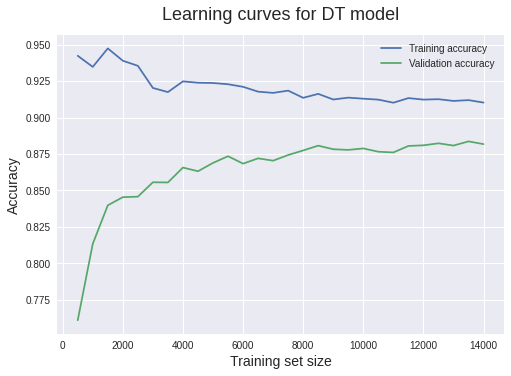

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for DT model', fontsize = 18, y = 1.03)
plt.legend()

2.3 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#optimal parameters:
#OrderedDict([('activation', 'relu'),('alpha', 1.3171286604916028),('learning_rate', 'constant'),('max_iter', 2895),('solver', 'lbfgs')])
# (obtained from Bayes Optimisation)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = MLPClassifier(activation='relu', alpha=1.3171286604916028, learning_rate='constant', max_iter=2895, solver='lbfgs', random_state=0), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for MLP classifier model', fontsize = 18, y = 1.03)
plt.legend()